https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy import stats as st

In [128]:
columns = ["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"]

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", names=columns)

df = df.drop(0)
df["Age"] = df["Age"].astype(float).round().astype(int)

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [129]:
# male = 1; female = 0
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == "Female" else 1)

# yes = 1; no = 0
df["family_history_with_overweight"] = df["family_history_with_overweight"].apply(lambda x: 1 if x == "yes" else 0)

# yes = 1; no = 0
df["FAVC"] = df["FAVC"].apply(lambda x: 1 if x == "yes" else 0)

# yes = 1; no = 0
df["SMOKE"] = df["SMOKE"].apply(lambda x: 1 if x == "yes" else 0)

# yes = 1; no = 0
df["SCC"] = df["SCC"].apply(lambda x: 1 if x == "yes" else 0)

# walking = 1; vehicle = 0
df["MTRANS"] = df["MTRANS"].apply(lambda x: 1 if x == "Walking" else 0)

label_mapping = {
    "Normal_Weight": 0,
    "Insufficient_Weight": 0,
    "Overweight_Level_I": 0.5,
    "Overweight_Level_II": 0.5,
    "Obesity_Type_I": 1,
    "Obesity_Type_II": 2,
    "Obesity_Type_III": 3
}

# Apply the mapping using the lambda function
df["NObeyesdad"] = df["NObeyesdad"].apply(lambda x: label_mapping.get(x, x))

label_mapping = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3,
}

# Apply the mapping using the lambda function
df["CALC"] = df["CALC"].apply(lambda x: label_mapping.get(x, x))
df["CAEC"] = df["CAEC"].apply(lambda x: label_mapping.get(x, x))

df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,0,21,1.62,64,1,0,2,3,1,0,2,0,0,1,0,0,0.0
2,0,21,1.52,56,1,0,3,3,1,1,3,1,3,0,1,0,0.0
3,1,23,1.8,77,1,0,2,3,1,0,2,0,2,1,2,0,0.0
4,1,27,1.8,87,0,0,3,3,1,0,2,0,2,0,2,1,0.5
5,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0,0.5
6,1,29,1.62,53,0,1,2,3,1,0,2,0,0,0,1,0,0.0
7,0,23,1.5,55,1,1,3,3,1,0,2,0,1,0,1,0,0.0
8,1,22,1.64,53,0,0,2,3,1,0,2,0,3,0,1,0,0.0
9,1,24,1.78,64,1,1,3,3,1,0,2,0,1,1,2,0,0.0
10,1,22,1.72,68,1,1,2,3,1,0,2,0,1,1,0,0,0.0


In [130]:
df.shape

(2111, 17)

In [131]:
missing = []
# loop through all rows in the dataframe with df.iterrows()
for i, row in df.iterrows():
    try:
        # check if each value in the row can be turned into a float
        [float(val) for val in list(row)]
    except:
        # if cannot be converted to a float, this row has invalid data.
        missing.append(i)
missing

[]

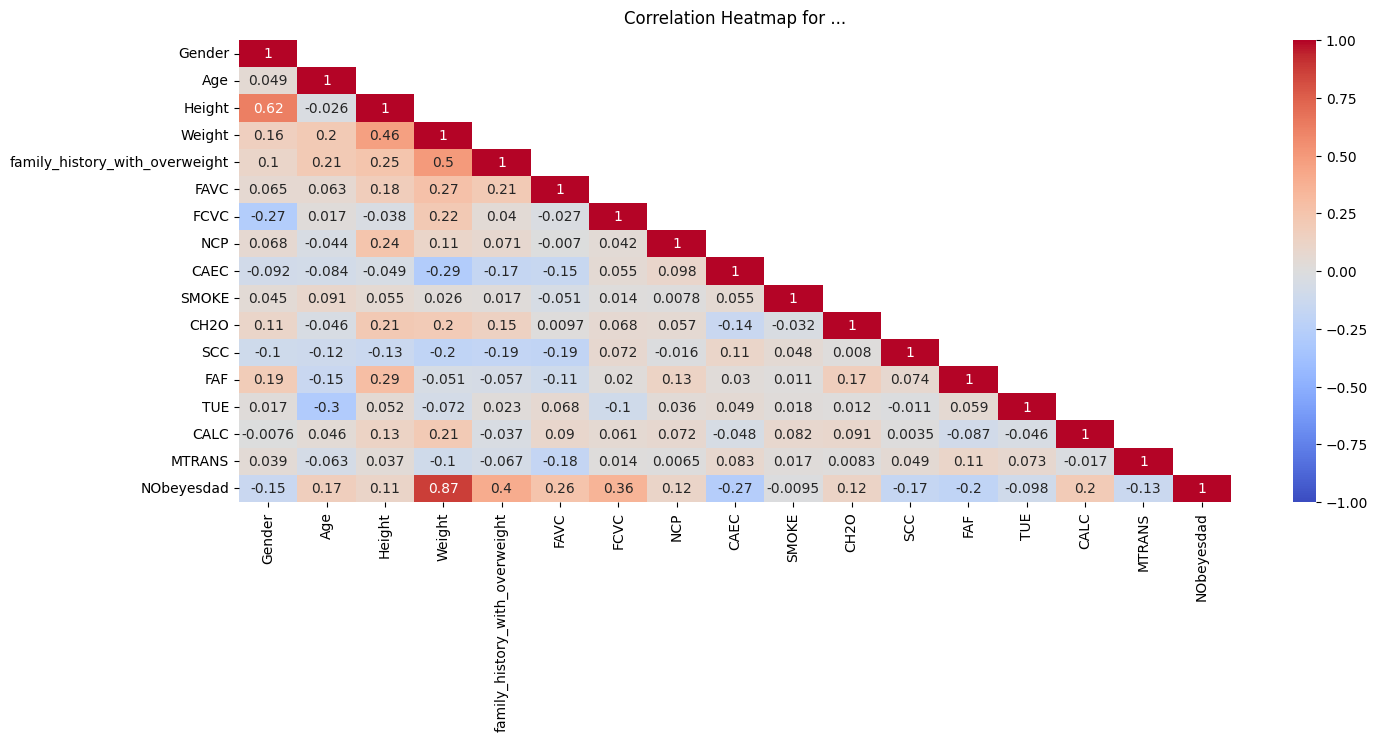

In [132]:
plt.figure(figsize=(16, 6))

corr = df.corr()

mask=np.triu(corr)
np.fill_diagonal(mask, False)

heatmap = sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title("Correlation Heatmap for ...", fontdict={"fontsize":12}, pad=12)

plt.show()

In [133]:
allAge = df["Age"].sort_values().unique()
allAge

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 51, 52, 55, 56, 61])

In [134]:
allAge.size

40

In [135]:
labels = ["Ages 14 to 23", "Ages 24 to 33", "Ages 34 to 43", "Ages 44 to 61"]

bins = [14, 29, 33, 43, 61]
ages = df.groupby(pd.cut(df["Age"], bins))
age_dfs = []

for i, age in enumerate(ages.groups.keys()):
    curr = ages.get_group(age)
    age_dfs.append(curr)
    print(f"Length of bin {i + 1} ({labels[i]}): {len(curr)}")

Length of bin 1 (Ages 14 to 23): 1724
Length of bin 2 (Ages 24 to 33): 178
Length of bin 3 (Ages 34 to 43): 185
Length of bin 4 (Ages 44 to 61): 23


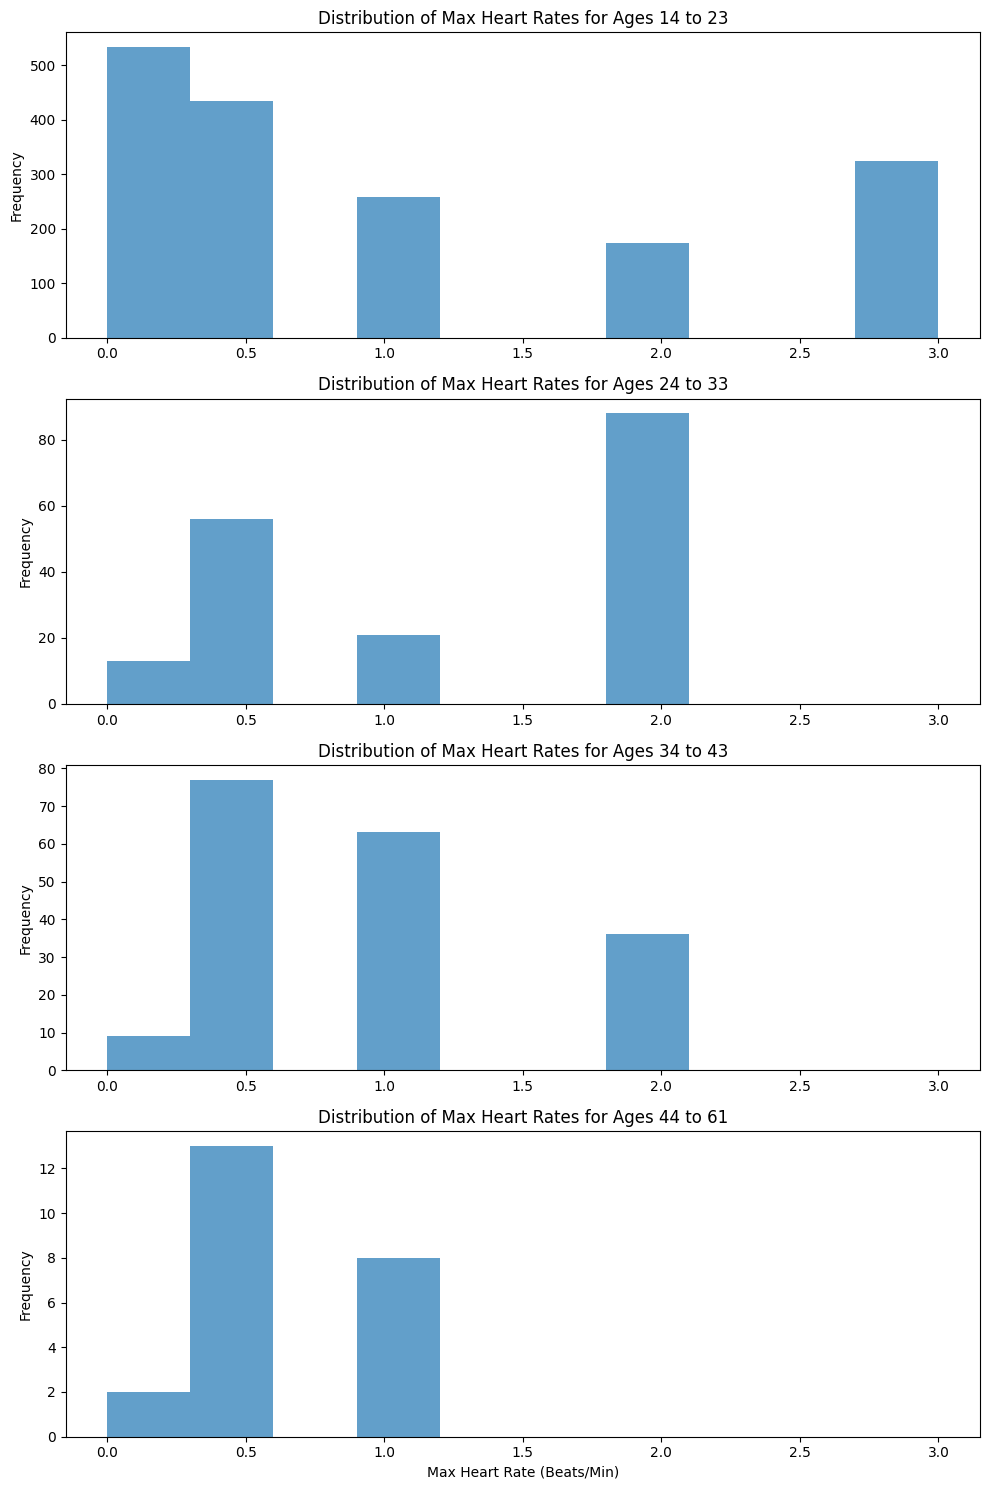

In [139]:
min = np.min(df["NObeyesdad"])
max = np.max(df["NObeyesdad"])

fig, axs = plt.subplots(4, figsize=(10, 15))

for i in range(4):
    axs[i].hist(age_dfs[i]["NObeyesdad"], range=(min, max), alpha=0.7, label=labels[i])
    axs[i].set(title=f"Distribution of Max Heart Rates for {labels[i]}", ylabel="Frequency")

plt.xlabel("")?
plt.tight_layout()
plt.show()